In [1]:
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix

from sklearn.linear_model import Ridge, LinearRegression
import numpy as np

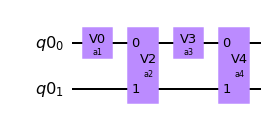

In [2]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

a1 = Parameter('a1')
V1 = QuantumCircuit(1, name='V0')
V1.ry(a1,0)

a2 = Parameter('a2')
V2 = QuantumCircuit(2, name='V2')
V2.ry(a2,1)
V2.cnot(1,0)
V2.cnot(0,1)

a3 = Parameter('a3')
V3 = QuantumCircuit(1, name='V3')
V3.ry(np.pi/2 + a3,0)

a4 = Parameter('a4')
V4 = QuantumCircuit(2, name='V4')
V4.ry(a4,1)
V4.cnot(0,1)


rho = QuantumCircuit(q, name='rho')
rho.append(V1.to_instruction(),[q[0]])
rho.append(V2.to_instruction(),[q[0],q[1]])
rho.append(V3.to_instruction(),[q[0]])
rho.append(V4.to_instruction(),[q[0],q[1]])

rho.draw('mpl')

In [3]:
theta_range = np.tile(np.linspace(0,np.pi,10),(5,1)).transpose()

In [4]:
job = execute(rho,
              backend=BasicAer.get_backend('statevector_simulator'),
              parameter_binds=[{a1: theta[0], a2 : theta[1], a3 : theta[2], a4 : theta[3]} for theta in theta_range])


In [5]:
# backend = BasicAer.get_backend('statevector_simulator')
# job = execute(rho, backend)
# qc_state = job.result().get_statevector(rho)
# qc_state

In [6]:
# from qiskit.quantum_info import Statevector, partial_trace

# out = Statevector.from_instruction(rho)
# partial_trace(out,[1])

In [7]:
# partial_trace(out,[1])

In [8]:
theta = np.random.rand(4)
rho1 = rho.bind_parameters({a1: theta[0], a2 : theta[1], a3 : theta[2], a4 : theta[3]})
# rho1.measure_all()
# simulator = Aer.get_backend('aer_simulator')
# circ = transpile(rho1, simulator)
# result = simulator.run(circ).result()
# counts = result.get_counts(circ)

In [9]:
IBMQ.providers()

[]

In [10]:
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
import qiskit.quantum_info as qi
from qiskit import IBMQ
from IBM_Q import API_IBM



IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_manila')

from qiskit.compiler import transpile, assemble
mapped_circuit = transpile(rho1, backend=backend)



In [11]:
# shots = 10000
# sim_statevector = Aer.get_backend('aer_simulator_statevector')
# job_statevector = sim_statevector.run(circ, shots=shots)
# counts_statevector = job_statevector.result().get_counts()

In [12]:


# # Transpile for simulator
# simulator = Aer.get_backend('aer_simulator')
# circ = transpile(circ, simulator)

# # Run and get counts
# result = simulator.run(circ).result()
# counts = result.get_counts(circ)
# counts

In [13]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc
import qiskit.quantum_info as qi

# Generate the state tomography circuits.
qst = state_tomography_circuits(rho1, q)

# Execute
job = qiskit.execute(qst, Aer.get_backend('qasm_simulator'), shots=50000)

# Fit result
qst_fit = StateTomographyFitter(job.result(), qst)
qst_fit_fitted = qst_fit.fit(method='lstsq')

/home/keisuke/miniconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/home/keisuke/miniconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/home/keisuke/miniconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibil

In [14]:
F_bell = qi.state_fidelity(qst_fit_fitted, Statevector.from_instruction(rho1))
print('State Fidelity: F = {:.5f}'.format(F_bell))

State Fidelity: F = 0.99950


In [15]:
from qiskit.quantum_info.operators import Operator, Pauli
circ = QuantumCircuit(2)
circ.z(0)

# Convert circuit to an operator by implicit unitary simulation
H2 = Operator(circ).data

circ = QuantumCircuit(2)
circ.z(1)

# Convert circuit to an operator by implicit unitary simulation
H3 = Operator(circ).data


circ = QuantumCircuit(2)
circ.x(0)
H4 = Operator(circ).data


circ = QuantumCircuit(2)
circ.x(1)
H5 = Operator(circ).data

In [16]:
from qiskit.quantum_info.operators import Operator, Pauli
import scipy
H0 = Operator(Pauli(label='ZZ')).data
H1 = Operator(Pauli(label='XX')).data

# gibbs_1 = scipy.linalg.expm(-(-0.5*H2 -0.5 *H3 + 0.3*H4 +0.3*H5 + 1*H1))
gibbs_1 = scipy.linalg.expm(-(0.5*H4 + 0.5*H5 + 1*H1 - 0.3*H2 - 0.3*H3 ))


# gibbs_1 = scipy.linalg.expm(-2*H1)
gibbs_1 /= np.trace(gibbs_1)
# gibbs_1 = np.round(gibbs_1,2)


/home/keisuke/miniconda3/envs/qiskit/lib/python3.9/site-packages/qiskit/quantum_info/operators/symplectic/pauli.py:187: DeprecationWarning: Initializing Pauli from `Pauli(label=l)` kwarg is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. Use `Pauli(l)` instead.
  base_z, base_x, base_phase = self._from_label_deprecated(label)


In [60]:
from functions import utils_
from importlib import reload
reload(utils_)

ham_dict = {}
ham_dict['ham'] = ['xx','x','x','z','z']
ham_dict['pos'] = [[0,1],[0],[1],[0],[1]]
ham_dict['c'] = [1,0.5,0.5,-0.3,-0.3]

In [68]:
VQS_ = utils_.VQS(4)

In [69]:
VQS_.set_ham(ham_dict)

In [70]:
theta = np.zeros(VQS_.n_params)
params = {VQS_.P[i] : theta[i] for i in range(VQS_.n_params)}
rho1 = VQS_.state().bind_parameters(params)
out = Statevector.from_instruction(rho1)
out

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0.5+0.j],
            dims=(2, 2, 2, 2))


In [71]:
theta = np.zeros(4)
estimator = utils_.estimate_params(        
        VQS_.V,
        VQS_.pos_est,
        VQS_.gs,
        VQS_.g_pos,
        ham_dict = VQS_.ham_dict,
        n = VQS_.n_params)

In [72]:
VQS_.ham_dict['pos']

[[0, 1, 2], [0, 1], [0, 2], [0, 1], [0, 2]]

In [73]:
N_ = [30]

In [74]:
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix
tau = 0
fid_list = []
rho_list = []
for N in N_:
    delta = (1/2)/N

    theta = np.zeros(VQS_.n_params)
    i = 0
    while True:
        params = {VQS_.P[i] : theta[i] for i in range(VQS_.n_params)}
        estimator.params = params
        A,C = estimator.estimate_AC(NUM = 10**3)
        clf = Ridge(fit_intercept=False, alpha=0)
        clf.fit(A, C)
#         clf = LinearRegression().fit(A, C)
        theta += clf.coef_ * delta
        tau += delta
        gibbs_1_density = DensityMatrix(gibbs_1)

        
        params = {VQS_.P[i] : theta[i] for i in range(VQS_.n_params)}
        rho1 = VQS_.state().bind_parameters(params)
        out = Statevector.from_instruction(rho1)
        rho1_ = partial_trace(out,[2,3])

        Fidelity = qi.state_fidelity(rho1_, gibbs_1_density)
        fid_list.append(Fidelity)
        rho_list.append(rho1)
        
        print('i = {} N={}: F = {:.5f}'.format(i, round(tau,3), Fidelity))
        
        if round(tau,3) >= 1/2:
            break
        i += 1


i = 0 N=0.017: F = 0.82085
i = 1 N=0.033: F = 0.83671
i = 2 N=0.05: F = 0.85045
i = 3 N=0.067: F = 0.86527
i = 4 N=0.083: F = 0.87832
i = 5 N=0.1: F = 0.89024
i = 6 N=0.117: F = 0.90239
i = 7 N=0.133: F = 0.91304
i = 8 N=0.15: F = 0.92325
i = 9 N=0.167: F = 0.93185
i = 10 N=0.183: F = 0.93992
i = 11 N=0.2: F = 0.94791
i = 12 N=0.217: F = 0.95477
i = 13 N=0.233: F = 0.96108
i = 14 N=0.25: F = 0.96700
i = 15 N=0.267: F = 0.97164
i = 16 N=0.283: F = 0.97586
i = 17 N=0.3: F = 0.97971
i = 18 N=0.317: F = 0.98318
i = 19 N=0.333: F = 0.98639
i = 20 N=0.35: F = 0.98881
i = 21 N=0.367: F = 0.99119
i = 22 N=0.383: F = 0.99315
i = 23 N=0.4: F = 0.99481
i = 24 N=0.417: F = 0.99602
i = 25 N=0.433: F = 0.99715
i = 26 N=0.45: F = 0.99788
i = 27 N=0.467: F = 0.99840
i = 28 N=0.483: F = 0.99880
i = 29 N=0.5: F = 0.99892


In [378]:
rho1.ry(-np.pi/2,0)
rho1.ry(-np.pi/2,1)
rho1.ry(-np.pi/2,2)
rho1.ry(-np.pi/2,3)

In [399]:
out = Statevector.from_instruction(rho1)
rho1_ = partial_trace(out,[2,3])


H0 = Operator(Pauli(label='ZZ')).data
H1 = Operator(Pauli(label='XX')).data


gibbs_2 = scipy.linalg.expm(-(0.5*H2 + 0.5 *H3 + 1*H0 + 0.3*H4 + 0.3*H5))
gibbs_2 /= np.trace(gibbs_2)



gibbs_2_density = DensityMatrix(gibbs_2)
Fidelity = qi.state_fidelity(rho1_, gibbs_2_density)

In [386]:
Fidelity

0.9990109886986331

In [354]:
circ = QuantumCircuit(2)
# circ.ry(-np.pi/2,0)
# circ.ry(-np.pi/2,1)
# circ.x(1)
# circ.ry(np.pi/2,0)
# circ.ry(np.pi/2,1)
circ.z(1)
np.diag(Operator(circ).data)


array([ 1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j])

In [61]:
np.diag(rho1_)

array([0.0013833 +0.j, 0.28894601+0.j, 0.69841512+0.j, 0.01125556+0.j])

In [510]:
np.diag(gibbs_1_density)

array([0.00483724+0.j, 0.01314897-0.j, 0.26410418+0.j, 0.71790961+0.j])

In [64]:
np.diag(rho1_.data)

array([0.0013833 +0.j, 0.28894601+0.j, 0.69841512+0.j, 0.01125556+0.j])

In [126]:
clf.coef_ @ A   - C

array([-0.17629688, -0.17629688, -0.17629688, -0.17629688])

In [122]:
A @ np.linalg.inv(A) @ C - C

array([ 0.00000000e+00,  3.60822483e-15,  2.88657986e-15, -2.28354662e-15])

In [70]:

theta = np.zeros(VQS_.n_params)
params = {VQS_.P[i] : theta[i] for i in range(VQS_.n_params)}
rho1 = VQS_.state().bind_parameters(params)
out = Statevector.from_instruction(rho1)
rho1_ = partial_trace(out,[2,3])

Fidelity = qi.state_fidelity(rho1_, gibbs_1_density)
fid_list.append(Fidelity)
rho_list.append(rho1)
print('i = {} N={}: F = {:.5f}'.format(i, N, Fidelity))
print(rho1_)
i += 1

i = 2 N=200: F = 0.37524
DensityMatrix([[0.25+0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j],
               [0.  +0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j]],
              dims=(2, 2))


In [71]:
out

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0.5+0.j],
            dims=(2, 2, 2, 2))


In [189]:
Fidelity = qi.state_fidelity(rho1, gibbs_1_density)
print('State Fidelity: F = {:.5f}'.format(Fidelity))

State Fidelity: F = 0.99959


In [49]:
from sklearn.linear_model import Ridge
import numpy as np
y = C
X = A


Ridge(alpha=0.01)

In [50]:
A @ clf.coef_.reshape(-1,1) - C.reshape(-1,1)

array([[-0.00511299],
       [ 0.00635906],
       [ 0.00135994],
       [ 0.00443207]])

In [330]:
q = QuantumRegister(3)
generators_qargs_ = [[q[0],q[1]],[q[0],q[2]],[q[0],q[1]],[q[0],q[2]]]
gates_qargs_ = [[q[1]],[q[1],q[2]],[q[1]],[q[1],q[2]]]

generators_qargs = [[0,1],[0,2],[0,1],[0,2]]
gates_qargs = [[1],[1,2],[1],[1,2]]


c = ClassicalRegister(1)
A = QuantumCircuit(q,c, name='Fisher')
A.h(0)
A.draw('mpl')
l = 2
j = 3
der_pos = [l, j]

for i in range(N):
    if i in der_pos:
        A.x(0)
        A.append(generators[i].to_instruction(), generators_qargs_[i])
    A.append(gates[i].to_instruction(),gates_qargs_[i])
A.h(0)
A.measure(0, 0)

In [331]:
# theta = np.random.rand(4) * np.pi
A = A.bind_parameters({a1: theta[0], a2 : theta[1], a3 : theta[2], a4 : theta[3]})

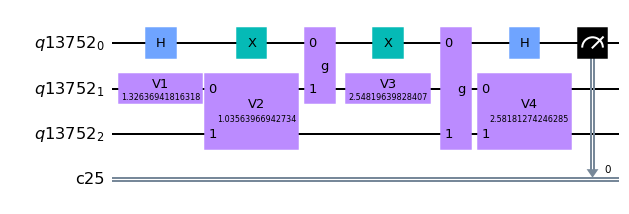

In [332]:
A.draw('mpl')

In [333]:
A_results = []
NUM = 20000
for _ in range(10):
    
    backend = BasicAer.get_backend('qasm_simulator')
    result = execute(A, backend, shots=NUM).result()
    counts  = result.get_counts(A)
    A_results.append((counts['0']/NUM)*2 -1)

In [289]:
for i in range(0):
    print(i)

In [334]:
np.mean(A_results)

-0.4933199999999999

## Calculate exact fisher information

In [504]:
l, j = [0,2]
q = QuantumRegister(2)
gates = [V1, V2, V3, V4]
gates_qargs = [[q[0]],[q[0],q[1]],[q[0]],[q[0],q[1]]]
N = len(gates)
g = QuantumCircuit(1, name='g')
g.y(0)
generators = [g,g,g,g]
generators_qargs = [[q[0]],[q[1]],[q[0]],[q[1]]]

In [505]:
V_l = QuantumCircuit(q, name='V_l')
V_j = QuantumCircuit(q, name='V_j')

for i in range(N):
    if i == l:
        V_l.append(generators[i], generators_qargs[i])
    V_l.append(gates[i],gates_qargs[i])
    
for i in range(N):
    if i == j:
        V_j.append(generators[i], generators_qargs[i])
    V_j.append(gates[i],gates_qargs[i])

V_l = V_l.bind_parameters({a1: theta[0], a2 : theta[1], a3 : theta[2], a4 : theta[3]})
V_j = V_j.bind_parameters({a1: theta[0], a2 : theta[1], a3 : theta[2], a4 : theta[3]})

backend = BasicAer.get_backend('unitary_simulator')
job = execute(V_l, backend)
V_l_array = job.result().get_unitary(V_l, decimals=8)


job = execute(V_j, backend)
V_j_array = job.result().get_unitary(V_j, decimals=8)

print('l = {}, j = {}, A_lj = {}'.format(l,j,(np.conjugate(V_j_array.transpose()) @ V_l_array)[0,0].real))

l = 0, j = 2, A_lj = 1.849055158986701e-09


In [506]:
V = QuantumCircuit(q, name='V')

for i in range(N):

    V.append(gates[i],gates_qargs[i])
    


V = V.bind_parameters({a1: theta[0], a2 : theta[1], a3 : theta[2], a4 : theta[3]})

backend = BasicAer.get_backend('unitary_simulator')
job = execute(V, backend)
V_array = job.result().get_unitary(V, decimals=8)

H = QuantumCircuit(q, name='H')
H.z(0)
backend = BasicAer.get_backend('unitary_simulator')
job = execute(H, backend)
H_array = job.result().get_unitary(H, decimals=8)

In [507]:
H_array

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [508]:
((V_l_array.conj().T @ H_array @ V_array)[0,0] * (-1j)).real

-0.2766919211306063

In [405]:
jcirc = QuantumCircuit(2)
circ.x(1)

3